In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# plot 한글출력
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# warning message 제거
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('../01.Data_Collection/films_updated.csv')

print(df.shape)
df.sample()

(687, 38)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모
427,1987,20170590,2017-12-27,한국,한국,드라마,15세이상관람가,장편,일반영화,(주)우정필름,씨제이이앤엠(주),138226.0,1299.0,5.816558e+10,7231638.0,1.463892e+10,1776877.0,0,장준환,장준환,10060507.0,남자,감독,"1987|화이: 괴물을 삼킨 아이|잉투기|감독들, 김기영을 말하다|지구를 지켜라|유...",김경찬,김경찬,김경찬,20190128.0,남자,시나리오(각본),파이프라인|뺑반|1987|카트,"김윤석,하정우,유해진,김태리,박희순,이희준,설경구,여진구,유정호,윤재국,지웅배,정재...",김윤석,NaN,10005276,남자,배우,"바이러스(가제)|미성년|암수살인|1987|남한산성|당신, 거기 있어줄래요|검은 사제..."


# F-rated

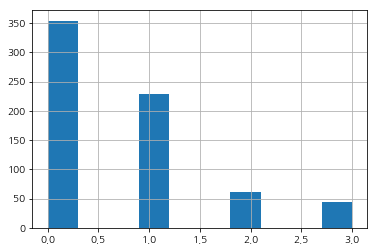

In [5]:
# F-rated 등급 별 영화 수, 비율(분석 전체 영화 대비) eg. 3등급은 n개고, 이건 n%. 2등급은 ….
df['F-rated'].hist()

In [6]:
data =df.groupby('F-rated')['영화코드'].size().reset_index()
F_rated_count = data.rename(columns={'영화코드': '영화 수'})
F_rated_count['전체 영화 중 비율(%)'] = round(F_rated_count['영화 수'] * 100/ sum(F_rated_count['영화 수']), 2)
F_rated_count

,F-rated,영화 수,전체 영화 중 비율(%)
0,0,354,51.53
1,1,228,33.19
2,2,61,8.88
3,3,44,6.40


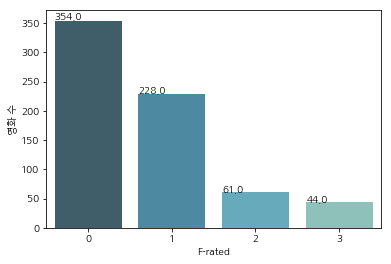

In [7]:
# F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수', data=F_rated_count, palette='GnBu_d')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

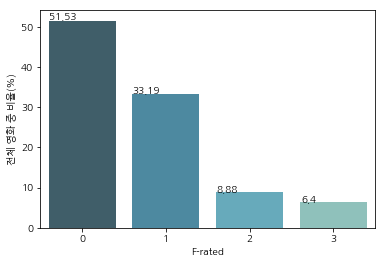

In [8]:
# F-rated 지수별 비율
ax = sns.barplot(x='F-rated', y='전체 영화 중 비율(%)', data=F_rated_count, palette='GnBu_d')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

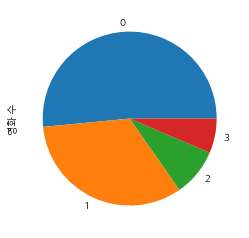

In [9]:
ax = F_rated_count['영화 수'].plot.pie()
# 컬러
# annotation

# 성비 - F-rated

### 대표감독 성별 - F-rated

In [10]:
# 대표감독 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['감독성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['감독성별'] == '여자', '감독성별 전체 영화 수'] = sum(data[data['감독성별'] == '여자']['영화 수'])
data.loc[data['감독성별'] == '남자', '감독성별 전체 영화 수'] = sum(data[data['감독성별'] == '남자']['영화 수'])
data['감독성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['감독성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,감독성별,F-rated,영화 수,감독성별 전체 영화 수,감독성별에 따른 F-rated 지수 비율(%)
0,남자,0,354,593.0,59.70
1,남자,1,219,593.0,36.93
2,남자,2,20,593.0,3.37
3,여자,1,9,94.0,9.57
4,여자,2,41,94.0,43.62
5,여자,3,44,94.0,46.81


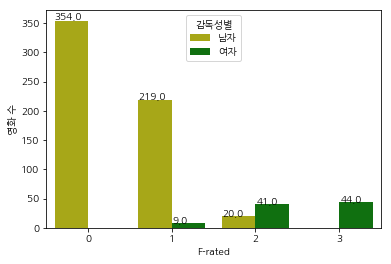

In [11]:
# 대표감독성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='감독성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

ValueError: Colormap YeGn is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

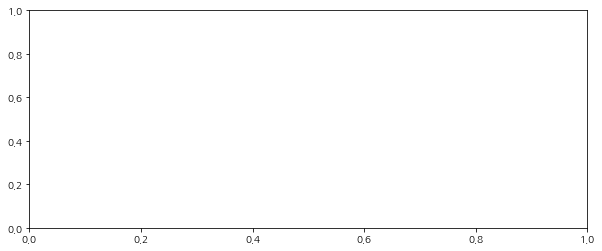

In [39]:
# stack bar plot
data = pd.DataFrame(df['F-rated'].unique(), columns=['F-rated'])
data = data.sort_values('F-rated', ascending=True)

F_rated_count_by_director_sex = df.groupby(['F-rated', '감독성별'])['영화코드'].size()

for i in range(4):
    for sex in df['감독성별'].unique():
        if sex in list(F_rated_count_by_director_sex[i].index):
            data.loc[data['F-rated'] == i, f'{sex}'] = F_rated_count_by_director_sex[i][sex]
        else:
            data.loc[data['F-rated'] == i, f'{sex}'] = 0

data.plot(figsize=(10, 4), kind='bar', stacked=True, colormap='YeGn')

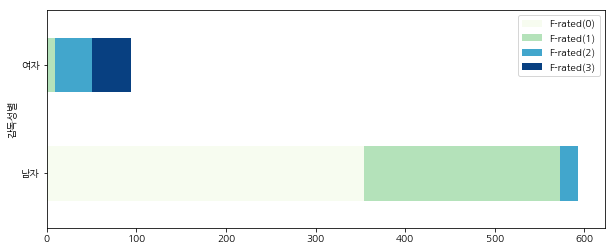

In [53]:
# stack bar plot
data = pd.DataFrame(df['감독성별'].unique(), columns=['감독성별'])
F_rated_count_by_director_sex = df.groupby(['감독성별', 'F-rated'])['영화코드'].size()

for sex in data['감독성별']:
    for i in range(4):
        if i in list(F_rated_count_by_director_sex[sex].index):
            data.loc[data['감독성별'] == sex, f'F-rated({i})'] = F_rated_count_by_director_sex[sex][i]
        else:
            data.loc[data['감독성별'] == sex, f'F-rated({i})'] = 0
        
data.set_index('감독성별').plot(figsize=(10, 4), kind='barh', stacked=True, colormap='GnBu')

남성 감독의 경우 F-rated 지수가 높아질수록 영화 수가 현저히 줄어드는데 반해, 

여성 감독의 경우 F-rated 지수가 높은 영화의 비중이 훨씬 높다

    → 여성 감독들이 남성 감독에 비해 여성 배우, 여성 작가와 협업하는 비율이 높다
    → 감독이 여성인 경우, 약 90% 가 주연배우나 작가 중 여성을 1 명 이상 기용한다

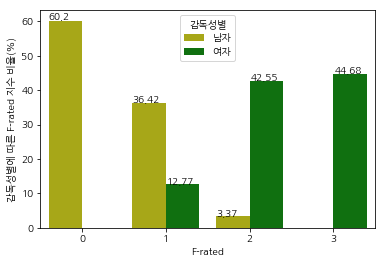

In [12]:
# 대표감독성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='감독성별에 따른 F-rated 지수 비율(%)',hue='감독성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

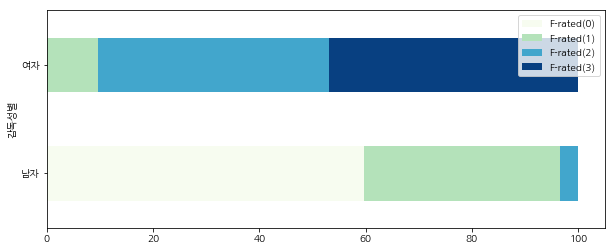

In [49]:
# stack bar plot
data = pd.DataFrame(df['감독성별'].unique(), columns=['감독성별'])
F_rated_count_by_director_sex = df.groupby(['감독성별', 'F-rated'])['영화코드'].size()
movie_count_by_director_sex = df.groupby(['감독성별'])['영화코드'].size()

for sex in data['감독성별']:
    for i in range(4):
        if i in list(F_rated_count_by_director_sex[sex].index):
            data.loc[data['감독성별'] == sex, f'F-rated({i})'] = F_rated_count_by_director_sex[sex][i] * 100 / movie_count_by_director_sex[sex]
        else:
            data.loc[data['감독성별'] == sex, f'F-rated({i})'] = 0
        
data
data.set_index('감독성별').plot(figsize=(10, 4), kind='barh', stacked=True, colormap='GnBu')

비율로 보면 감독성별에 따른 F-rated 차이가 훨씬 두드러진다

### 대표작가 성별 - F-rated

In [13]:
# 대표작가 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['작가성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['작가성별'] == '여자', '작가성별 전체 영화 수'] = sum(data[data['작가성별'] == '여자']['영화 수'])
data.loc[data['작가성별'] == '남자', '작가성별 전체 영화 수'] = sum(data[data['작가성별'] == '남자']['영화 수'])
data['작가성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['작가성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,작가성별,F-rated,영화 수,작가성별 전체 영화 수,작가성별에 따른 F-rated 지수 비율(%)
0,남자,0,323,466.0,69.31
1,남자,1,142,466.0,30.47
2,남자,2,1,466.0,0.21
3,여자,1,58,153.0,37.91
4,여자,2,53,153.0,34.64
5,여자,3,42,153.0,27.45


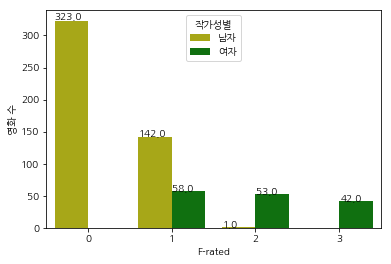

In [14]:
# 대표작가성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='작가성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

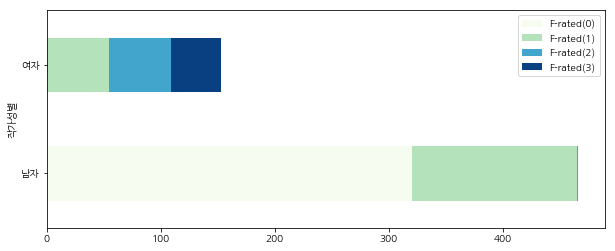

In [59]:
# stack bar plot
data = pd.DataFrame(df['작가성별'].unique(), columns=['작가성별'])
# data
F_rated_count_by_writer_sex = df.groupby(['작가성별', 'F-rated'])['영화코드'].size()
# F_rated_count_by_writer_sex
for sex in data['작가성별'][:2]:
    for i in range(4):
        if i in list(F_rated_count_by_writer_sex[sex].index):
            data.loc[data['작가성별'] == sex, f'F-rated({i})'] = F_rated_count_by_writer_sex[sex][i]
        else:
            data.loc[data['작가성별'] == sex, f'F-rated({i})'] = 0
        
data
data[:2].set_index('작가성별').plot(figsize=(10, 4), kind='barh', stacked=True, colormap='GnBu')

대표 작가가 남성인 경우 F-rated 2등급이 거의 없다

    대표 작가가 남성인 경우, 대표 감독이 남성인 경우보다 F-rated 가 낮은 것을 알 수 있다

대표 작가가 여성인 경우, F-rated 등급은 고르게 퍼져있는 편

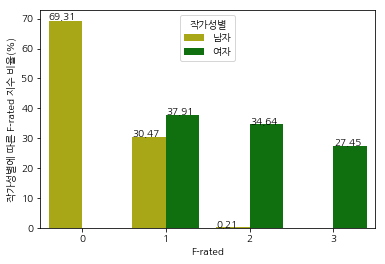

In [15]:
# 대표작가성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='작가성별에 따른 F-rated 지수 비율(%)',hue='작가성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

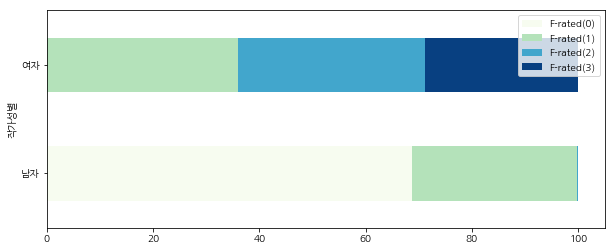

In [60]:
# stack bar plot
data = pd.DataFrame(df['작가성별'].unique(), columns=['작가성별'])
F_rated_count_by_writer_sex = df.groupby(['작가성별', 'F-rated'])['영화코드'].size()
movie_count_by_writer_sex = df.groupby(['작가성별'])['영화코드'].size()

for sex in data['작가성별'][:2]:
    for i in range(4):
        if i in list(F_rated_count_by_writer_sex[sex].index):
            data.loc[data['작가성별'] == sex, f'F-rated({i})'] = F_rated_count_by_writer_sex[sex][i] * 100 / movie_count_by_writer_sex[sex]
        else:
            data.loc[data['작가성별'] == sex, f'F-rated({i})'] = 0
        
data
data[:2].set_index('작가성별').plot(figsize=(10, 4), kind='barh', stacked=True, colormap='GnBu')

In [16]:
# 대표 감독이 곧 대표 작가인 경우
# print(df[df['감독코드'] == df['작가코드']].shape)
df[df['감독코드'] == df['작가코드']][['영화명', '대표감독']]
df[df['감독코드'] == df['작가코드']]['대표감독'].value_counts()

print('감독 == 작가: ')
print(df[df['감독코드'] == df['작가코드']]['감독성별'].value_counts())
print(' ')
print('감독 != 작가: ')
print(df[df['감독코드'] != df['작가코드']]['감독성별'].value_counts())
# df['감독성별'].value_counts()

감독 == 작가: 
남자    324
여자     62
Name: 감독성별, dtype: int64
 
감독 != 작가: 
남자    269
여자     32
Name: 감독성별, dtype: int64


대표감독이 곧 대표작가인 경우가 전체의 절반가량

감독성비 자체가 7:1로 기울어 있으므로 F-rated 가 쏠릴 수 밖에 없음

### 주연배우 성별 - F-rated

In [98]:
# 주연배우 성별에 따른 F-rated 등급별 영화 수
data = df.groupby(['배우성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['배우성별'] == '여자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '여자']['영화 수'])
data.loc[data['배우성별'] == '남자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '남자']['영화 수'])
data['배우성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['배우성별 전체 영화 수'], 2)
F_rated_by_director_sex = data
F_rated_by_director_sex

,배우성별,F-rated,영화 수,배우성별 전체 영화 수,배우성별에 따른 F-rated 지수 비율(%)
0,남자,0,354,452.0,78.32
1,남자,1,64,452.0,14.16
2,남자,2,34,452.0,7.52
3,여자,1,164,235.0,69.79
4,여자,2,27,235.0,11.49
5,여자,3,44,235.0,18.72


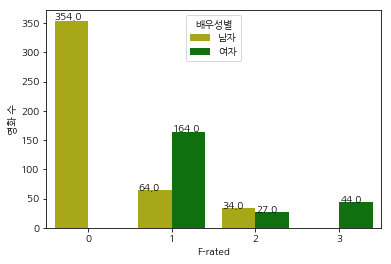

In [99]:
# 주연배우성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='배우성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

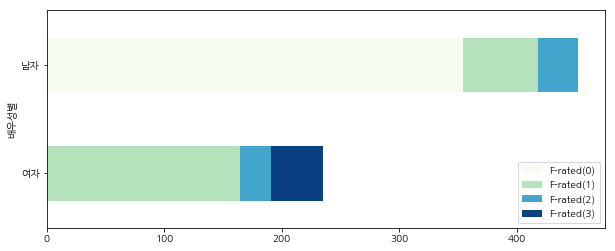

In [100]:
# stack bar plot
data = pd.DataFrame(df['배우성별'].unique(), columns=['배우성별'])
F_rated_count_by_actor_sex = df.groupby(['배우성별', 'F-rated'])['영화코드'].size()

for sex in data['배우성별'][:2]:
    for i in range(4):
        if i in list(F_rated_count_by_actor_sex[sex].index):
            data.loc[data['배우성별'] == sex, f'F-rated({i})'] = F_rated_count_by_actor_sex[sex][i]
        else:
            data.loc[data['배우성별'] == sex, f'F-rated({i})'] = 0
        
# data[:2].sort_values('배우성별', ascending=False).set_index('배우성별')
data[:2].set_index('배우성별').plot(figsize=(10, 4), kind='barh', stacked=True, colormap='GnBu')

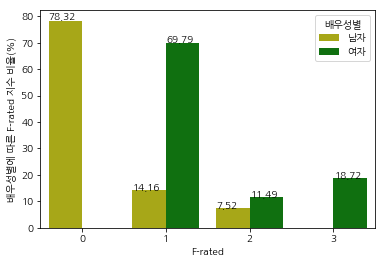

In [101]:
# 주연배우성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='배우성별에 따른 F-rated 지수 비율(%)',hue='배우성별', data=F_rated_by_director_sex, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

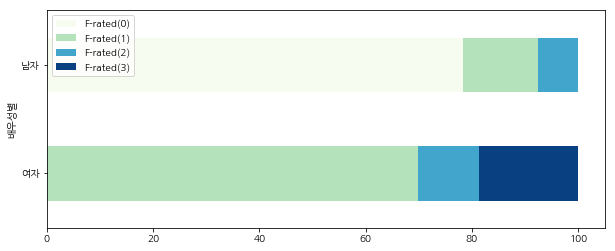

In [102]:
# stack bar plot
data = pd.DataFrame(df['배우성별'].unique(), columns=['배우성별'])
F_rated_count_by_actor_sex = df.groupby(['배우성별', 'F-rated'])['영화코드'].size()
movie_count_by_actor_sex = df.groupby(['배우성별'])['영화코드'].size()

for sex in data['배우성별'][:2]:
    for i in range(4):
        if i in list(F_rated_count_by_actor_sex[sex].index):
            data.loc[data['배우성별'] == sex, f'F-rated({i})'] = F_rated_count_by_actor_sex[sex][i] * 100 / movie_count_by_actor_sex[sex]
        else:
            data.loc[data['배우성별'] == sex, f'F-rated({i})'] = 0
        
data
data[:2].set_index('배우성별').plot(figsize=(10, 4), kind='barh', stacked=True, colormap='GnBu')

주연배우가 여성인 영화가 대표감독이나 대표작가가 여성인 영화에 비해 월등히 많다

    → 에로영화 때문인지 살펴보기

주연배우가 남성인 경우 대부분의 영화가 F-rated 지수 0 이다

    → 대표감독이나 대표작가가 남성인 영화에 비해 F-rated 지수 쏠림 현상이 더욱 심하다

### 여성주연이 많은 이유- 에로영화 때문인지 살펴보기

드라마, 다큐멘터리, 애니메이션이 전체의 50%
    
    에로영화는 대부분 [청소년관람불가-멜로/로맨스] 에 속하므로 에로영화 때문에 여성주연영화 중 F-rated 1 인 영화가 많았던 것은 아니다 

다큐멘터리, 애니메이션, 멜로/로맨스 에서 여성주연배우가 많음

In [89]:
df['대표장르'] = df['장르'].apply(lambda x: str(x).split(',')[0])
df[df['F-rated'] == 1]['대표장르'].value_counts()

# len(df[df['F-rated'] == 1]['대표장르'])

드라마       68
다큐멘터리     45
애니메이션     26
멜로/로맨스    18
코미디       13
미스터리      13
스릴러       11
범죄         8
사극         8
공포(호러)     8
액션         4
가족         3
판타지        2
공연         1
Name: 대표장르, dtype: int64

### 등급-장르 뜯어보기

#### 등급별
전체관람가는 [다큐멘터리], [애니메이션]이 대부분

청소년관람불가는 두 분류로 나눌 수 있을 것
- [멜로/로맨스] -> 대부분 에로영화
- [드라마], [범죄], [스릴러], [액션], [미스터리], [코미디]

### 여성주연비율과 등급-장르의 관계
#### 여성주연 비율 높은 등급-장르
- 전체관람가: 애니메이션, 드라마, 다큐멘터리
- 12세이상관람가: 멜로/로맨스
- 15세이상관람가: 멜로/로맨스, 미스터리
- 청소년관람불가: 스릴러

    → 청소년관람불가-멜로/로맨스에서 여성주연비율이 급격히 줄어든 것은 에로영화 때문

    → 미스터리, 스릴러의 경우 여성주연일 때 더 무서우니까 그런가?

#### 여성주연 비율이 특히 낮은 등급-장르
- 전체관람가: 
- 12세이상관람가: 사극, 전쟁
- 15세이상관람가: 액션, 범죄, 코미디
- 청소년관람불가: 범죄

    → 전쟁, 액션, 범죄, 사극은 남성의 전유물
    
    → 코미디는 15세이상관람가에서 가장 영화수가 많고, 가장 여성주연비율이 낮다
        임창정, 정상훈, 공형진, 유해진, 최성국 등 코미디물을 전문으로하는 남성주연배우는 꽤 있는데, 코미디 여성주연배우는 풀 자체가 없는 듯
        
#### 특이점
[전체관람가-다큐멘터리]에서는 여성주연비율이 50% 가까이 되는데, 12세이상관람가와 15세이상관람가로 등급이 높아질수록 여성주연비율이 20% 대까지 낮아진다


[전체관람가-애니메이션]에서는 여성주연비율이 50% 이상인데, 나머지 등급에서는 여성주연이 거의 없다


[사극]에서는 여성주연 영화를 거의 찾아보기 힘들다 


등급, 장르 모두 파이가 작은 곳에서만 여성주연비율이 높은 것을 알 수 있다. 
    - 등급: 전체관람가, 청소년관람불가
    - 장르: 다큐멘터리, 애니메이션 (심지어 다큐멘터리는 배우가 나오지도 않음)
    
    → 유일하게 파이가 큰 분야에서 여성주연비율이 높은 건 [12세이상관람가-멜로/로맨스], [15세이상관람가-멜로/로맨스]

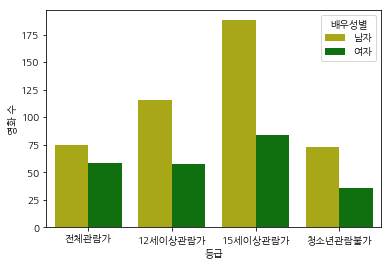

In [21]:
# 영화 등급별 주연배우 성비
data = df.groupby(['배우성별', '등급'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
sns.barplot(y='영화 수', hue='배우성별', x='등급', data=data, order=(['전체관람가', '12세이상관람가', '15세이상관람가', '청소년관람불가']), palette=['y', 'g'])

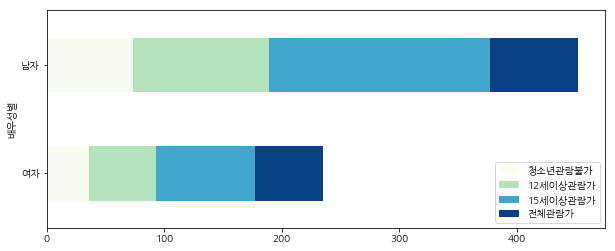

In [81]:
# stack bar plot
data = pd.DataFrame(df['배우성별'].unique(), columns=['배우성별'])
grade_count_by_actor_sex = df.groupby(['배우성별', '등급'])['영화코드'].size()

for sex in data['배우성별']:
    for grade in df['등급'].unique():
        if grade in list(grade_count_by_actor_sex[sex].index):
            data.loc[data['배우성별'] == sex, f'{grade}'] = grade_count_by_actor_sex[sex][grade]
        else:
            data.loc[data['배우성별'] == sex, f'{grade}'] = 0
        
# data.set_index('배우성별').plot(figsize=(10, 4), kind='barh', x=['여자', '남자'], stacked=True, colormap='GnBu')

data.plot(figsize=(10, 4), kind='barh', x='배우성별', stacked=True, colormap='GnBu')

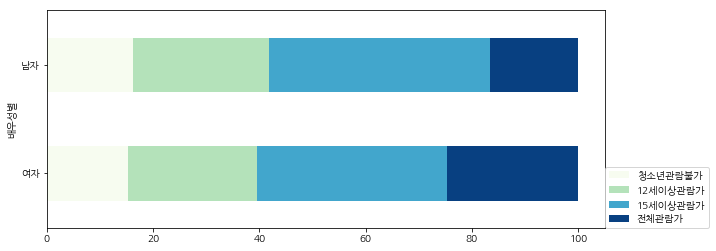

In [85]:
# stack bar plot
data = pd.DataFrame(df['배우성별'].unique(), columns=['배우성별'])
grade_count_by_actor_sex = df.groupby(['배우성별', '등급'])['영화코드'].size()
movie_count_by_actor_sex = df.groupby(['배우성별'])['영화코드'].size()

for sex in data['배우성별']:
    for grade in df['등급'].unique():
        if grade in list(grade_count_by_actor_sex[sex].index):
            data.loc[data['배우성별'] == sex, f'{grade}'] = grade_count_by_actor_sex[sex][grade] * 100 / movie_count_by_actor_sex[sex]
        else:
            data.loc[data['배우성별'] == sex, f'{grade}'] = 0
        
data
data.set_index('배우성별').plot(figsize=(10, 4), kind='barh', stacked=True, colormap='GnBu')
plt.legend(loc=[1, 0])

전체관람가에서 여성주연배우 비율이 높다

전체 영화수가 많은 등급일수록 (12세이상관람가, 15세이상관람가) 여성주연배우 비율이 낮다
    
    → 등급별로 장르를 구분해서 살펴보기

# 다큐멘터리를 제외한 배우성별-F-rated 관계 다시 보기
전체관람가-다큐멘터리에서 여성배우 성비가 높다

다큐멘터리에서 배우는 직업인이 아닌 경우가 대부분이므로, 다큐멘터리 장르를 제외하고 보기로 함

### 주연배우 성별 - F-rated 
다큐멘터리 제외

In [91]:
df[df['대표장르']!='다큐멘터리']['장르'].value_counts()

드라마                          166
애니메이션                         34
멜로/로맨스                        32
코미디                           26
스릴러                           21
범죄,드라마                        13
범죄,액션                         13
멜로/로맨스,드라마                    12
코미디,드라마                       12
액션                            12
미스터리,스릴러                      12
드라마,코미디                       12
사극                            10
액션,드라마                         8
멜로/로맨스,코미디                     8
판타지,드라마                        6
공포(호러)                         6
스릴러,드라마                        6
드라마,가족                         6
공포(호러),스릴러                     6
미스터리,드라마                       5
사극,드라마                         5
사극,액션                          4
범죄,스릴러                         4
가족,드라마                         4
범죄                             4
코미디,액션                         4
기타                             3
드라마,판타지                        3
드라마,멜로/로맨스                     3
범죄,코미디    

In [95]:
# 주연배우 성별에 따른 F-rated 등급별 영화 수
data = df[df['대표장르'] != '다큐멘터리'].groupby(['배우성별', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
data.loc[data['배우성별'] == '여자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '여자']['영화 수'])
data.loc[data['배우성별'] == '남자', '배우성별 전체 영화 수'] = sum(data[data['배우성별'] == '남자']['영화 수'])
data['배우성별에 따른 F-rated 지수 비율(%)'] = round(data['영화 수'] * 100 /data['배우성별 전체 영화 수'], 2)
F_rated_by_director_sex_not_docu = data
F_rated_by_director_sex_not_docu

,배우성별,F-rated,영화 수,배우성별 전체 영화 수,배우성별에 따른 F-rated 지수 비율(%)
0,남자,0,299,370.0,80.81
1,남자,1,45,370.0,12.16
2,남자,2,26,370.0,7.03
3,여자,1,138,190.0,72.63
4,여자,2,17,190.0,8.95
5,여자,3,35,190.0,18.42


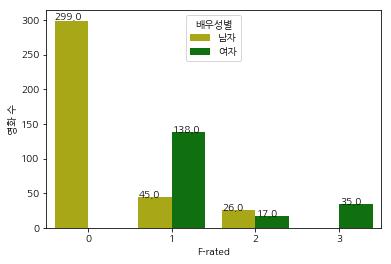

In [96]:
# 주연배우성별에 따른 F-rated 지수별 영화 수
ax = sns.barplot(x='F-rated', y='영화 수',hue='배우성별', data=F_rated_by_director_sex_not_docu, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

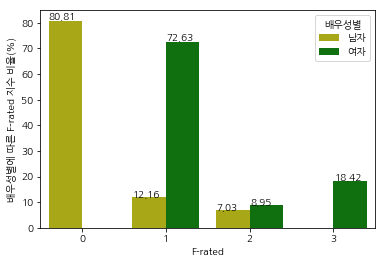

In [97]:
# 주연배우성별에 따른 F-rated 지수별 영화 비율
ax = sns.barplot(x='F-rated', y='배우성별에 따른 F-rated 지수 비율(%)',hue='배우성별', data=F_rated_by_director_sex_not_docu, palette=['y', 'g'])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.01))

# F-rated 지수-장르

In [22]:
# df[df['등급'] == '전체관람가'][['영화명', '대표장르', '배우성별']]
# df[df['등급'] == '전체관람가']['대표장르'].value_counts()
# data = df.groupby(['등급', '대표장르', '배우성별'])['영화코드'].size().reset_index()
# data = data.rename(columns={'영화코드': '영화 수'})
# data

# plt.figure(figsize=[20, 6])
# sns.barplot(x='대표장르', y='영화 수', hue='등급', hue_order=(['전체관람가', '12세이상관람가', '15세이상관람가', '청소년관람불가']), data=data)

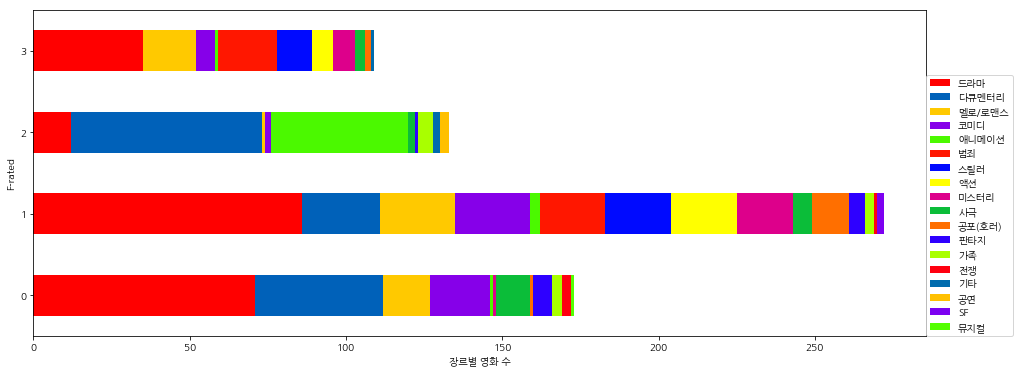

In [23]:
data = df.groupby(['등급'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})
grade_genre = df.groupby(['등급', '대표장르'])['영화코드'].size()

# 장르 순서 세팅
data_genre = df.groupby('대표장르')['영화코드'].size().reset_index()

# 등급-장르별 영화수 넣기
for genre in data_genre.sort_values('영화코드', ascending=False)['대표장르']:
    for grade in df['등급'].unique():
        if genre in list(grade_genre[grade].reset_index()['대표장르']):
            data.loc[data['등급'] == grade, f'{genre}'] = grade_genre[grade][genre]
        else: data.loc[data['등급'] == grade, f'{genre}'] = 0


# 등급-장르별 영화수 stack bar plot 그리기
ax = data.drop('영화 수', axis=1).plot(figsize=(16, 6), kind='barh', stacked=True, colormap='prism')

# # 영화수 표시
# for p in ax.patches:
#     width, height = p.get_width(), p.get_height()
# #     if width > 10:
#     x, y = p.get_xy() 
#     ax.text(x+width/2, 
#             y+height/2, 
# #             f'{genre}',
#             '{:.0f}'.format(width), 
#             horizontalalignment='center', 
#             verticalalignment='center')
           
plt.xlabel('장르별 영화 수')
plt.ylabel('F-rated')
plt.legend(loc=[1, 0])

<Figure size 1152x432 with 0 Axes>

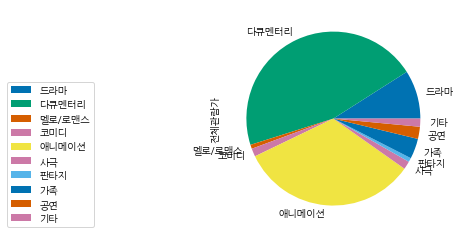

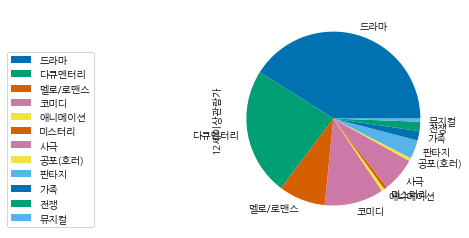

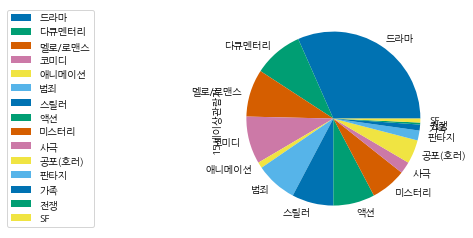

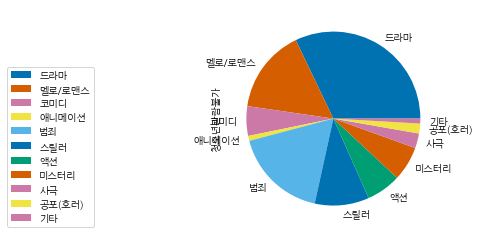

In [24]:
# 등급별 장르 파이차트

data = df[df['등급'] == '전체관람가'].groupby(['대표장르'])['영화코드'].size().reset_index().rename(columns={'영화코드': '영화 수'})
data = data.rename(columns={'영화 수':'전체관람가'})
data = data.merge(df[df['등급'] == '12세이상관람가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'12세이상관람가'})
data = data.merge(df[df['등급'] == '15세이상관람가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'15세이상관람가'})
data = data.merge(df[df['등급'] == '청소년관람불가'].groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'청소년관람불가'})
data = data.merge(df.groupby(['대표장르'])['영화코드'].size().reset_index(), how='outer', on='대표장르').rename(columns={'영화코드':'전체등급'})
data

data_grade_genre = data.sort_values('전체등급', ascending=False).transpose().reset_index()
data_grade_genre.columns = data_grade_genre.iloc[0]
data_grade_genre = data_grade_genre.drop(data_grade_genre.index[0]).rename(columns={'대표장르':'등급'})
data_grade_genre = data_grade_genre.rename(columns={'대표장르':'등급'})
data_grade_genre = data_grade_genre.fillna(0)
data_grade_genre = data_grade_genre.set_index('등급')

data_grade_genre
plt.figure(figsize=[16, 6])

# print(plt.style.available)
plt.style.use('seaborn-colorblind')
data_grade_genre.transpose().plot.pie(y='전체관람가')
plt.legend(loc=[-1,0])
data_grade_genre.transpose().plot.pie(y='12세이상관람가')
plt.legend(loc=[-1,0])
data_grade_genre.transpose().plot.pie(y='15세이상관람가')
plt.legend(loc=[-1,0])
data_grade_genre.transpose().plot.pie(y='청소년관람불가')
plt.legend(loc=[-1,0])

애니메이션은 대부분 전체관람가
다큐멘터리는 절반 정도 전체관람가, 나머지 절반은 12세이상관람가와 15세이상관람가

전체관람가를 제외한 모든 등급에서 드라마가 1순위

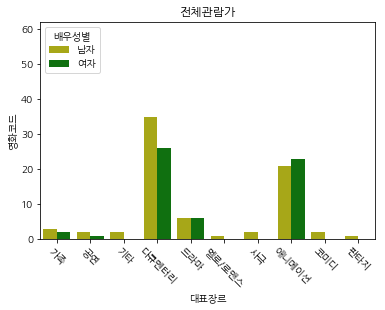

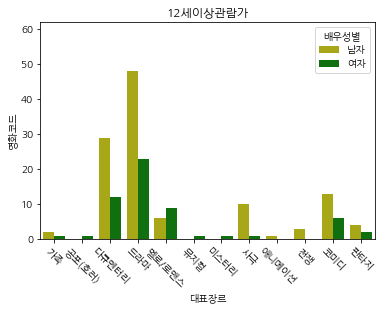

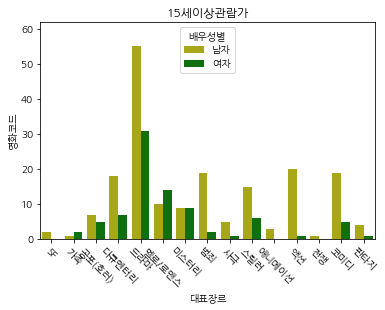

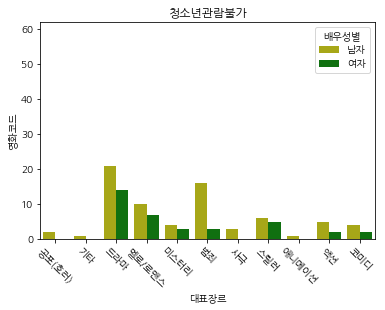

In [25]:
data = df.groupby(['대표장르', '등급', '배우성별'])['영화코드'].size().reset_index()

sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '전체관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('전체관람가')
plt.xticks(rotation=-45)
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '12세이상관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('12세이상관람가')
plt.xticks(rotation=-45)
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '15세이상관람가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('15세이상관람가')
plt.xticks(rotation=-45)
plt.show()
sns.barplot(x='대표장르', y='영화코드', hue='배우성별', data=data[data['등급'] == '청소년관람불가'], palette=['y', 'g'])
plt.ylim(0, 62)
plt.title('청소년관람불가')
plt.xticks(rotation=-45)
plt.show()

In [ ]:
# 성별-장르
# stack bar plot 

In [26]:
df[df['대표장르'] == '미스터리'][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '15세이상관람가') & (df['대표장르'] == '코미디')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '12세이상관람가') & (df['대표장르'] == '멜로/로맨스')][['등급', '영화명', '감독', '배우']]

df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '드라마')][['상영횟수', '영화명', '감독', '배우']]
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '코미디')]['영화명']
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '멜로/로맨스')]['영화명']

df[(df['등급'] == '전체관람가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '12세이상관람가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '15세이상관람가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]
df[(df['등급'] == '청소년관람불가') & (df['대표장르'] == '애니메이션')][['등급', '영화명', '감독', '배우']]

df[(df['등급'] == '전체관람가') & (df['대표장르'] == '다큐멘터리')][['영화명', '감독', '주연배우','배우코드', '배우필모']]
df[(df['등급'] == '12세이상관람가') & (df['대표장르'] == '다큐멘터리')][['영화명', '감독', '주연배우','배우코드', '배우필모']]


,영화명,감독,주연배우,배우코드,배우필모
13,망원동 인공위성,김형주,송호준,20220936,망원동 인공위성
41,명량: 회오리 바다를 향하여,"정세교,김한민",김한민,10006204,봉오동 전투|사냥|명량: 회오리 바다를 향하여|명량|최종병기 활 감독확장판|최종병기...
50,마이 페어 웨딩,장희선,김조광수,10005655,출장수사|악질경찰|조선명탐정: 흡혈괴마의 비밀|흔들리는 물결|마이 페어 웨딩|경성학...
96,춘희막이,박혁지,김춘희,20190130,춘희막이
108,울보 권투부,이일하,도꾜 조선 중고급학교 권투부,0,울보 권투부
126,나쁜 나라,"김진열,이수정,정일건",최경덕,20228869,소공녀|나쁜 나라
158,독도의 영웅들,권순도,김승헌,20267635,독도의 영웅들
182,업사이드 다운,김동빈,박영우,20248319,업사이드 다운
213,빅뱅 메이드,변진호,권지용,10069845,빅뱅 메이드|원 오브 어 카인드 3D ; G-DRAGON 2013 1ST WORLD...
214,경계,"문정현,블라디미르 토도로비치,다니엘 루디 하리얀토",문정현,10026800,경계


In [27]:
# data = df[df['등급'] == '청소년관람불가'].groupby(['배우성별', '대표장르', 'F-rated'])['영화코드'].size().reset_index()
# data = data.rename(columns={'영화코드': '영화 수'})
# sns.barplot(x='F-rated', y='영화 수', hue='배우성별', data=data[data['대표장르'] == '멜로/로맨스'])

# 연도별 - F-rated

In [104]:
df['datetime'] = pd.to_datetime(df['개봉일'])
df['year'] = pd.to_datetime(df['개봉일']).dt.year
df['month'] = pd.to_datetime(df['개봉일']).dt.month
df['day'] = pd.to_datetime(df['개봉일']).dt.day
df['weekday'] = pd.to_datetime(df['개봉일']).dt.dayofweek
df['weekday_name'] = pd.to_datetime(df['개봉일']).dt.weekday_name

# df = df.drop('dayofweek', axis=1)
# df = df.rename(columns={'weekday':'weekday_name'})
print(df.shape)
df.sample()

(687, 45)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,대표장르,datetime,year,month,day,weekday,weekday_name
233,그랜드파더,20166127,2016-08-31,한국,한국,"액션,드라마",청소년관람불가,장편,독립/예술영화,(주)한이야기,"(주)인벤트스톤,(주)디스테이션",3933.0,288.0,233692400.0,31640.0,55962800.0,7516.0,0,이서,이서,10055931.0,남자,감독,춘몽|그랜드파더|타투|사람을 찾습니다|말아톤|아카시아(Acacia)|클래식|일단뛰어...,황은성,황은성,황은성,20240907.0,남자,시나리오(각본),그랜드파더,"박근형,고보결,정진영,박진아,박초연,정재구,이상철,이승연,이예은,우기홍,이정현",박근형,NaN,10028490,남자,배우,증인|사랑하기 때문에|그랜드파더|탐정 홍길동: 사라진 마을|장수상회|저스틴|가문의 ...,액션,2016-08-31,2016,8,31,2,Wednesday


In [116]:
# 주중, 주말 컬럼 추가
# 개봉일 주중, 주말은 의미 없는듯

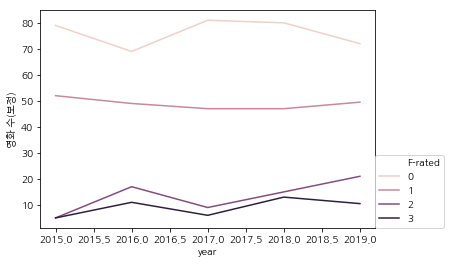

In [29]:
# 연도별 F-rated 등급 비율의 변화
data = df.groupby(['year', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})

# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

sns.lineplot(hue='F-rated', y='영화 수(보정)', x='year', data=data)
plt.legend(loc=[1,0])

# sns.barplot(hue='F-rated', y='영화 수(보정)', x='year', data=data)

(2019년 데이터는 8월까지 데이터를 이용해 보정값으로 계산)

F-rated 0, F-rated 1 등급은 줄어드는 중

F-rated 지수 2, 3 등급은 미미하지만 늘어나는 중

    → 전체적으로 서서히 F-rated 등급이 높아지고 있다고 볼 수 있음

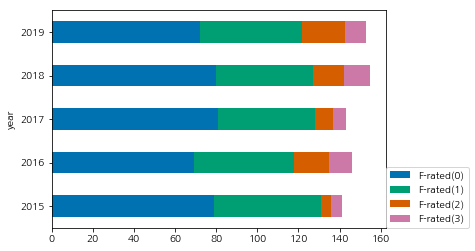

In [30]:
data = df.groupby(['year'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

year_f_rated = df.groupby(['year', 'F-rated'])['영화코드'].size()
for year in df['year'].unique():
    for i in range(4):
        data.loc[data['year'] == year, f'F-rated({i})'] = year_f_rated[year][i]

# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
for column in list(data.columns)[2:]:
    data.loc[data['year'] == 2019, column] = data[column] * 3/2

# stack bar plot
data.set_index('year').drop('영화 수', axis=1).plot(kind='barh', stacked=True)
plt.legend(loc=[1, 0])

## 연도별 F-rated 비율

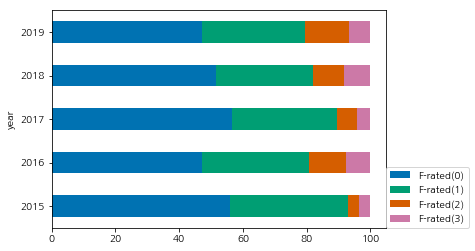

In [31]:
data = df.groupby(['year'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

year_f_rated = df.groupby(['year', 'F-rated'])['영화코드'].size()
for year in df['year'].unique():
    for i in range(4):
        data.loc[data['year'] == year, f'F-rated({i})'] = year_f_rated[year][i] * 100 / data[data['year'] == year]['영화 수']

# stack bar plot
data.set_index('year').drop('영화 수', axis=1).plot(kind='barh', stacked=True)
plt.legend(loc=[1, 0])

비율로 보면 

F-rated 0 인 영화 수 줄고 있다

F-rated 1 인 영화 수 큰 차이 없지만 줄고 있다

F-rated 2 인 영화 수 늘고 있다

F-rated 3 인 영화 수 늘고 있다

→ 전체적으로 2016년에 수치가 급격히 변화했다가 다시 돌아간 후 천천히 변화중

(0, 140)

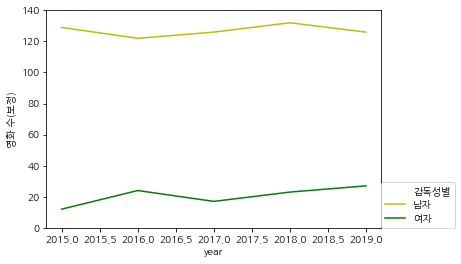

In [111]:
### 연도별 대표감독 성비 변화 추이
data = df.groupby(['year', '감독성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

ax = sns.lineplot(x='year', y='영화 수(보정)', hue='감독성별', data=data, palette=['y', 'g'])
plt.legend(loc=[1,0])
plt.ylim(0, 140)

대표감독, 대표작가, 주연배우 중 성비가 가장 크게 차이나는 것은 대표감독 

    여성 1: 남성 7
    
여성 대표감독 수는 느리지만 꾸준히 늘고있는 것으로 보인다

    2016년에 2배가량 증가 이후 2017년 감소

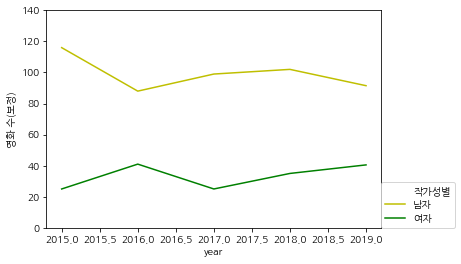

In [112]:
### 연도별 대표작가 성비 변화 추이
data = df.groupby(['year', '작가성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

ax = sns.lineplot(x='year', y='영화 수(보정)', hue='작가성별', data=data, palette=['y', 'g'])
plt.ylim([0, 140])
plt.legend(loc=[1,0])

2016년에 F-rated 변동이 컸던 것은 대표작가 때문인 것으로 확인

    → 여성 대표작가 수가 2016년에 가장 늘어남 2배 가량

이후 2017년 다시 2015년 수준으로 감소했지만 다시 늘고 있음

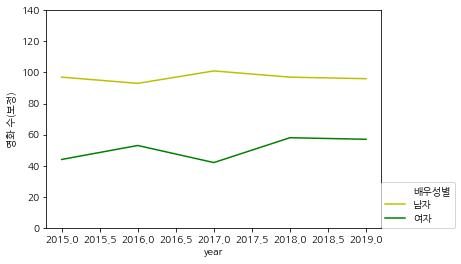

In [113]:
### 연도별 주연배우 성비 변화 추이
data = df.groupby(['year', '배우성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

ax = sns.lineplot(x='year', y='영화 수(보정)', hue='배우성별', data=data, palette=['y', 'g'])
plt.ylim([0, 140])
plt.legend(loc=[1,0])

대표감독, 대표작가, 주연배우 중에서 주연배우가 여성 비율이 가장 큼
    
    여성 1: 남성2
    
2016년에 여성주연 늘어났다가 2017년에 줄어듬

    2018년에 다시 2016년 수준으로 늘어남

남성주연 수에 큰 변화 없음
    
    아주 미미하게 줄어드는 것으로 보임

### 다큐멘터리 제외
주연배우 성비 중 전체관람가에서 여성비율이 큰데, 여성주연 수에 왜곡 발생

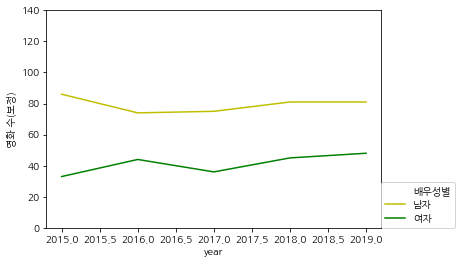

In [114]:
### 연도별 주연배우 성비 변화 추이
data = df[df['대표장르'] != '다큐멘터리'].groupby(['year', '배우성별'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})
# 2019년 영화 수 보정값 컬럼 생성 (9~12월치 추산)
data['영화 수(보정)'] = data['영화 수']
data.loc[data['year'] == 2019, '영화 수(보정)'] = data['영화 수'] * 3/2

ax = sns.lineplot(x='year', y='영화 수(보정)', hue='배우성별', data=data, palette=['y', 'g'])
plt.ylim([0, 140])
plt.legend(loc=[1,0])

#### 다큐멘터리 제외한 결과

여성 주연 늘고 있다
    
    2016년에 여성주연 늘어났다가 2017년에 줄어듬

남성주연 수에 큰 변화 없음
    
    2016년에 잠깐 떨어졌다가 회복

# 상영횟수등급 - F-rated

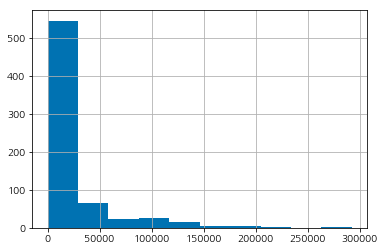

In [35]:
# 상영횟수등급(가칭)에 따른 F-rated 등급 비율의 변화
df['상영횟수'].hist()

In [36]:
df['상영횟수'].describe()

count       687.000000
mean      20039.374090
std       37517.679095
min          41.000000
25%         421.000000
50%        2322.000000
75%       20171.500000
max      292578.000000
Name: 상영횟수, dtype: float64

## 상영횟수 등급 4개로 나누기

등급 | 범위
-|-
4 | 40 <= x < 413.5
3 | 413.5 <= x < 2_160
2 | 2_160 <= x < 19_938
1 | 19_938 <= x

In [37]:
df['상영횟수등급'] = 4
df.loc[df['상영횟수'] < 19_938, '상영횟수등급'] = 3
df.loc[df['상영횟수'] < 2_160, '상영횟수등급'] = 2
df.loc[df['상영횟수'] < 413.5, '상영횟수등급'] = 1

df[['상영횟수', '상영횟수등급']].sample()

,상영횟수,상영횟수등급
9,20042.0,4


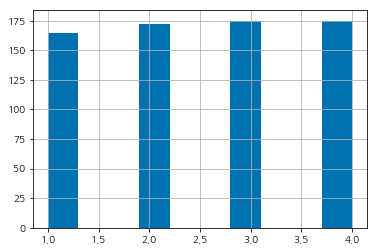

In [38]:
df['상영횟수등급'].hist()

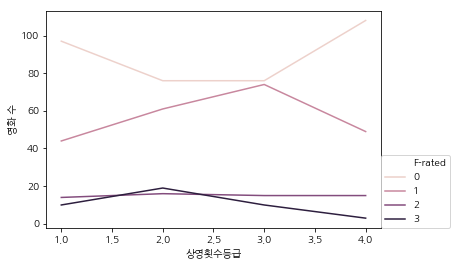

In [39]:
data = df.groupby(['상영횟수등급', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})

sns.lineplot(x='상영횟수등급', y='영화 수', hue='F-rated', data=data)
plt.legend(loc=[1, 0])

F-rated 0 은 상영횟수 중간등급에서 줄어든다

F-rated 1 은 F-rated 0 과 반대로 움직인다

F-rated 2 는 전 상영횟수등급에 고르게 분포해있다

F-rated 3 상영횟수등급 2에서 가장 많고 상영횟수가 많아질수록 적어진다

    → 상영횟수등급이 올라갈수록 여성영화가 늘다가 최고등급에서 꺾인다

# 상영횟수등급을 좀 더 촘촘하게 나눠보자


등급 | 범위
-|-
16 | x < 119.5
15 | 119.5 <= x < 203
14 | 203 <= x < 310
13 | 310 <= x <415
12 | 415 <= x < 563
11 | 563 <= x < 768.5
10 | 768.5 <= x < 1_257.5
9 | 1_257.5 <= x < 2_160
8 | 2_160 <= x < 4_077
7 | 4_077 <= x < 6_298
6 | 6_298 <= x < 11_339
5 | 11_339 <= x < 19_938
4 | 19_938 <= x < 36_117
3 | 36_117 <= x < 53_005
2 | 53_005 <= x < 94_249
1 | 94_249 <= x

In [40]:
# print(df[df['상영횟수등급'] == 1]['상영횟수'].describe())
# print(df[df['상영횟수등급'] == 2]['상영횟수'].describe())
# print(df[df['상영횟수등급'] == 3]['상영횟수'].describe())
# print(df[df['상영횟수등급'] == 4]['상영횟수'].describe())
df['상영횟수등급'] = 16
df.loc[df['상영횟수'] < 94_249, '상영횟수등급'] = 15
df.loc[df['상영횟수'] < 53_005, '상영횟수등급'] = 14
df.loc[df['상영횟수'] < 36_117, '상영횟수등급'] = 13
df.loc[df['상영횟수'] < 19_938, '상영횟수등급'] = 12
df.loc[df['상영횟수'] < 11_339, '상영횟수등급'] = 11
df.loc[df['상영횟수'] < 6_298, '상영횟수등급'] = 10
df.loc[df['상영횟수'] < 4_077, '상영횟수등급'] = 9
df.loc[df['상영횟수'] < 2_160, '상영횟수등급'] = 8
df.loc[df['상영횟수'] < 1_257.5, '상영횟수등급'] = 7
df.loc[df['상영횟수'] < 768.5, '상영횟수등급'] = 6
df.loc[df['상영횟수'] < 563, '상영횟수등급'] = 5
df.loc[df['상영횟수'] < 415, '상영횟수등급'] = 4
df.loc[df['상영횟수'] < 310, '상영횟수등급'] = 3
df.loc[df['상영횟수'] < 203, '상영횟수등급'] = 2
df.loc[df['상영횟수'] < 119.5, '상영횟수등급'] = 1

df[['상영횟수', '상영횟수등급']].sample()

,상영횟수,상영횟수등급
404,834.0,7


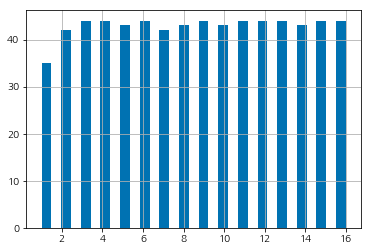

In [41]:
df['상영횟수등급'].hist(bins=31)

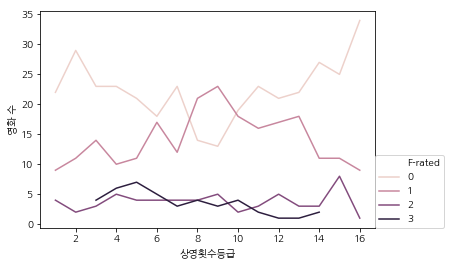

In [42]:
data = df.groupby(['상영횟수등급', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})

sns.lineplot(x='상영횟수등급', y='영화 수', hue='F-rated', data=data)
plt.legend(loc=[1, 0])

F-rated 0 인 영화는 상영횟수등급 8 에서 가장 적고, 상영횟수가 많을수록, 적을수록 양쪽 모두 증가한다
    
    흥행에 성공하는 영화일수록 
    흥행이 안되는 영화일수록
    → 유리천장, 유리바닥
    → 유리천장이 좀 더 공고하다
    
F-rated 1 인 영화는 F-rated 0 을 뒤집어 놓은 그래프 모양

F-rated 2 인 영화는 상영횟수등급 전체에 골고루 분포해있다 
    
    상영횟수등급 15 에서 갑자기 많음 - 뭘까? 대중에게 일정 이상 노출되는 여성영화는 흥행하는 건가

F-rated 3 인 영화는 상영횟수등급이 높을수록 증가한다
    
    상영횟수등급 15~16 최고흥행, 1~2 최저흥행 영화 중에는 없다
    → F-rated 0 과 마찬가지로 유리천장, 유리바닥이 생각나는 대목

In [117]:
# stack bar plot

In [43]:
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 16)][['영화명', '감독', '배우', '장르']]
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 15)][['영화명', '감독', '배우', '장르']]

,영화명,감독,배우,장르
80,뷰티 인사이드,백,"한효주,김대명,도지한,배성우,박신혜,이범수,박서준,김상호,천우희,우에노 주리,이재준...","판타지,멜로/로맨스"
210,굿바이 싱글,김태곤,"김혜수,마동석,김현수,김용건,서현진,곽시양,전석호,이미도,이성민,황미영,이형미,박지...","코미디,드라마"
383,아이 캔 스피크,김현석,"나문희,이제훈,박철민,염혜란,성유빈,김소진,이상희,정연주,이지훈,손숙,박준서,이승민...",코미디
401,부라더,장유정,"마동석,이동휘,이하늬,류정수,배준수,석정호,신은영,안백승,안승주,채지혜,이성은,이수...",코미디
453,리틀 포레스트,임순례,"김태리,류준열,문소리,진기주,홍성덕,이광용,이상준,김재훈,이유진,김정은,김주은,이태...",드라마
587,말모이,엄유나,"유해진,윤계상,김홍파,우현,김태훈,김선영,민진웅,이성욱,조현철,오희준,정기섭,허성태...",드라마
622,생일,이종언,"설경구,전도연,김보민,윤찬영,박종환,성유빈,탕준상,신문성,이봉련,김수진,안다정",드라마
684,유열의 음악앨범,정지우,"김고은,정해인,박해준,김국희,정유진,최준영,심달기,나철,권은수","멜로/로맨스,드라마"


# 상영횟수등급-연도별

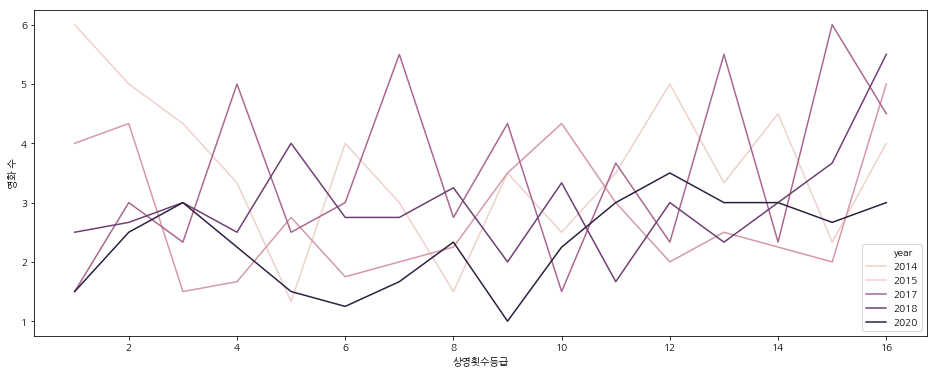

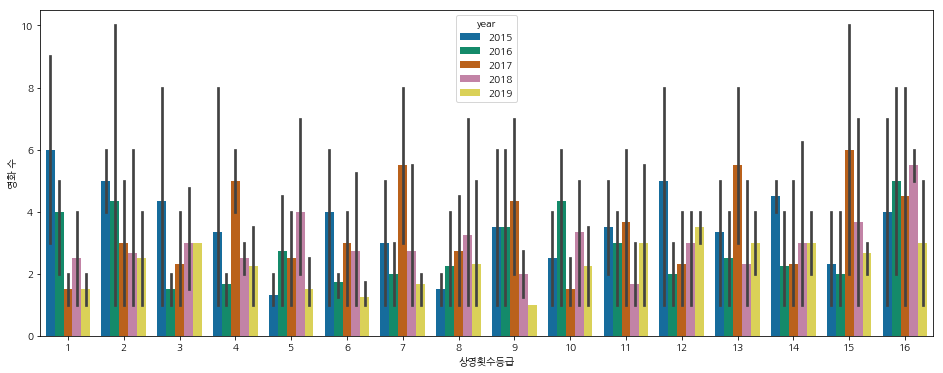

In [44]:
data = df.groupby(['year', '상영횟수등급', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드': '영화 수'})

plt.figure(figsize=[16, 6])
# sns.catplot(x='상영횟수등급', y='영화 수', hue='F-rated', kind='box', data=data)
sns.lineplot(x='상영횟수등급', y='영화 수', hue='year', data=data, ci=None)
plt.show()

plt.figure(figsize=[16, 6])
sns.barplot(x='상영횟수등급', y='영화 수', hue='year', data=data)
plt.show()
# data.T.plot(kind='bar', stacked=True)

# data

# 상영횟수등급 한번 더 쪼개본다

In [45]:
df[df['상영횟수등급'] == 1]['상영횟수'].describe()
df[df['상영횟수등급'] == 2]['상영횟수'].describe()
df[df['상영횟수등급'] == 3]['상영횟수'].describe()
df[df['상영횟수등급'] == 4]['상영횟수'].describe()
df[df['상영횟수등급'] == 5]['상영횟수'].describe()
df[df['상영횟수등급'] == 6]['상영횟수'].describe()
df[df['상영횟수등급'] == 7]['상영횟수'].describe()
df[df['상영횟수등급'] == 8]['상영횟수'].describe()
df[df['상영횟수등급'] == 9]['상영횟수'].describe()
df[df['상영횟수등급'] == 10]['상영횟수'].describe()
df[df['상영횟수등급'] == 11]['상영횟수'].describe()
df[df['상영횟수등급'] == 12]['상영횟수'].describe()
df[df['상영횟수등급'] == 13]['상영횟수'].describe()
df[df['상영횟수등급'] == 14]['상영횟수'].describe()
# df[df['상영횟수등급'] == 15]['상영횟수'].describe()
# df[df['상영횟수등급'] == 16]['상영횟수'].describe()

count       43.000000
mean     44866.139535
std       4370.665589
min      36990.000000
25%      41241.000000
50%      45453.000000
75%      47282.000000
max      53003.000000
Name: 상영횟수, dtype: float64

In [46]:
df['상영횟수등급'] = 32
df.loc[df['상영횟수'] < 126_527.5, '상영횟수등급'] = 31
df.loc[df['상영횟수'] < 94_249, '상영횟수등급'] = 30
df.loc[df['상영횟수'] < 65_281, '상영횟수등급'] = 29
df.loc[df['상영횟수'] < 53_005, '상영횟수등급'] = 28
df.loc[df['상영횟수'] < 45_453, '상영횟수등급'] = 27
df.loc[df['상영횟수'] < 36_117, '상영횟수등급'] = 26
df.loc[df['상영횟수'] < 25_465, '상영횟수등급'] = 25
df.loc[df['상영횟수'] < 19_938, '상영횟수등급'] = 24
df.loc[df['상영횟수'] < 16_176.5, '상영횟수등급'] = 23
df.loc[df['상영횟수'] < 11_339, '상영횟수등급'] = 22
df.loc[df['상영횟수'] < 8_299, '상영횟수등급'] = 21
df.loc[df['상영횟수'] < 6_298, '상영횟수등급'] = 20
df.loc[df['상영횟수'] < 5_178, '상영횟수등급'] = 19
df.loc[df['상영횟수'] < 4_077, '상영횟수등급'] = 18
df.loc[df['상영횟수'] < 2_764, '상영횟수등급'] = 17
df.loc[df['상영횟수'] < 2_160, '상영횟수등급'] = 16
df.loc[df['상영횟수'] < 1_554, '상영횟수등급'] = 15
df.loc[df['상영횟수'] < 1_257.5, '상영횟수등급'] = 14
df.loc[df['상영횟수'] < 1_048, '상영횟수등급'] = 13
df.loc[df['상영횟수'] < 768.5, '상영횟수등급'] = 12
df.loc[df['상영횟수'] < 635.5, '상영횟수등급'] = 11
df.loc[df['상영횟수'] < 563, '상영횟수등급'] = 10
df.loc[df['상영횟수'] < 462, '상영횟수등급'] = 9
df.loc[df['상영횟수'] < 415, '상영횟수등급'] = 8
df.loc[df['상영횟수'] < 364, '상영횟수등급'] = 7
df.loc[df['상영횟수'] < 310, '상영횟수등급'] = 6
df.loc[df['상영횟수'] < 243.5, '상영횟수등급'] = 5
df.loc[df['상영횟수'] < 203, '상영횟수등급'] = 4
df.loc[df['상영횟수'] < 153, '상영횟수등급'] = 3
df.loc[df['상영횟수'] < 119.5, '상영횟수등급'] = 2
df.loc[df['상영횟수'] < 65.5, '상영횟수등급'] = 1

df[['상영횟수', '상영횟수등급']].sample()

,상영횟수,상영횟수등급
65,169.0,4


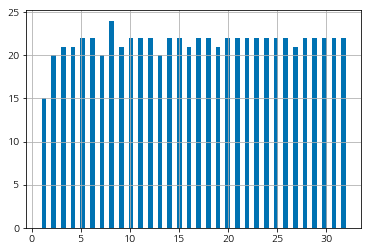

In [47]:
df['상영횟수등급'].hist(bins=63)

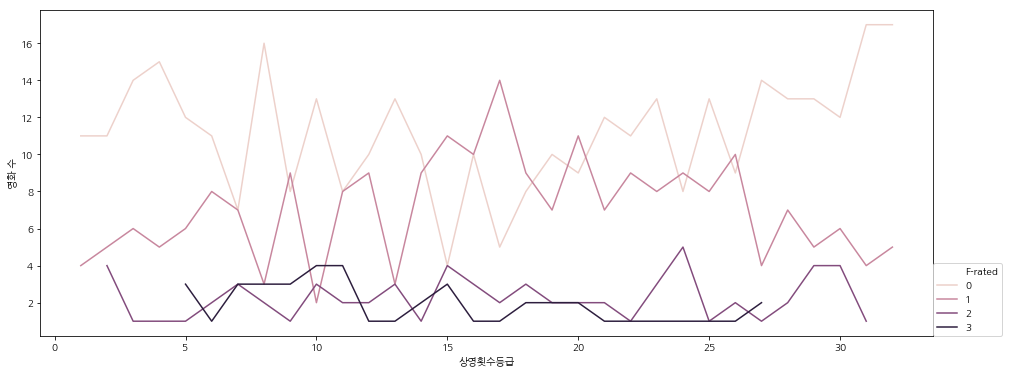

In [48]:
data = df.groupby(['상영횟수등급', 'F-rated'])['영화코드'].size().reset_index()
data = data.rename(columns={'영화코드':'영화 수'})

plt.figure(figsize=[16, 6])
sns.lineplot(x='상영횟수등급', y='영화 수', hue='F-rated', data=data)
plt.legend(loc=[1, 0])

16 등급이 적절한듯

In [49]:
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 24)][['영화명', '장르', '감독', '배우']]
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 29)][['영화명', '장르', '감독', '배우']]
df[(df['F-rated'] == 2) & (df['상영횟수등급'] == 30)][['영화명', '장르', '감독', '배우']]

,영화명,장르,감독,배우
383,아이 캔 스피크,코미디,김현석,"나문희,이제훈,박철민,염혜란,성유빈,김소진,이상희,정연주,이지훈,손숙,박준서,이승민..."
453,리틀 포레스트,드라마,임순례,"김태리,류준열,문소리,진기주,홍성덕,이광용,이상준,김재훈,이유진,김정은,김주은,이태..."
587,말모이,드라마,엄유나,"유해진,윤계상,김홍파,우현,김태훈,김선영,민진웅,이성욱,조현철,오희준,정기섭,허성태..."
622,생일,드라마,이종언,"설경구,전도연,김보민,윤찬영,박종환,성유빈,탕준상,신문성,이봉련,김수진,안다정"


In [50]:
# 전국매출액/상영횟수 - 재민님

In [51]:
# 전국관객수/상영횟수 - 재민님

In [ ]:
# 상영횟수등급 중위값에서 F-rated 등급이 높다 (상영횟수등급 낮을수록 에로영화 많고, 고예산 영화는 알탕)

# 추가하고 싶은 컬럼
- 감독 필모 갯수
- 작가 필모 갯수
- 배우 필모 갯수


- 감독 여러명인 경우 성비
- 작가 여러명인 경우 성비

# F-rated 컬럼 업데이트

In [63]:
f_rated = []
for i, row in df.iterrows():
    answer = 0
    if row['배우성별'] == '여자' : answer += 1
    if row['작가성별'] == '여자' : answer += 1
    if row['감독성별'] == '여자' : answer += 1
        
    f_rated.append(answer)
df['F-rated'] = f_rated
df.sample()

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,대표장르,datetime,year,month,day,weekday,weekday_name,상영횟수등급
393,유리정원,20164481,2017-10-25,한국,한국,"미스터리,드라마",12세이상관람가,장편,독립/예술영화,준필름,(주)리틀빅픽쳐스,4480.0,332.0,160437700.0,22752.0,60483700.0,8044.0,3,신수원,신수원,10040434.0,여자,감독,물비늘|젊은이의 양지|유리정원|마돈나|명왕성|레인보우|순환선|면도를 하다|가족시네마...,신수원,신수원,신수원,10040434.0,여자,감독,물비늘|젊은이의 양지|유리정원|마돈나|명왕성|레인보우|순환선|면도를 하다|가족시네마...,"문근영,김태훈,서태화,조예리,정애화,이승아,이기혁",문근영,콰지모드,10026674,여자,배우,"유리정원|사도|사랑 따윈 필요 없어|댄서의 순정|어린 신부|장화, 홍련|연애소설|길...",미스터리,2017-10-25,2017,10,25,2,Wednesday,19


# 제작비 - films_updated.csv 와 merge

In [118]:
cost = pd.read_csv('../01.Data_Collection/movie_money.csv')
cost['production_cost'] = cost['money'] * 10**8

df_cost = df.merge(cost, how='left', left_on='영화명', right_on='movieNm' )
df_cost = df_cost.drop('movieNm', axis=1)
print(df_cost.shape)
df_cost.sample()

(687, 49)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,대표장르,datetime,year,month,day,weekday,weekday_name,상영횟수등급,money,break_even point,production_cost
565,영주,20177341,2018-11-22,한국,한국,드라마,12세이상관람가,장편,독립/예술영화,NaN,CGV아트하우스,2758.0,106.0,192729750.0,24823.0,93991350.0,11461.0,3,차성덕,차성덕,10071129.0,여자,감독,영주|비밀은 없다|돼지 같은 여자|물 좀 주소|미쓰 홍당무|사라진 밤|울지 않는다,차성덕,차성덕,차성덕,10071129.0,여자,감독,영주|비밀은 없다|돼지 같은 여자|물 좀 주소|미쓰 홍당무|사라진 밤|울지 않는다,"김향기,김호정,유재명,탕준상,강병걸,강병걸,김기용,김기용,김서영,차진영",김향기,영주,10006228,여자,배우,증인|영주|신과함께-인과 연|신과함께-죄와 벌|눈길|특별수사: 사형수의 편지|오빠생...,드라마,2018-11-22,2018,11,22,3,Thursday,17,NaN,NaN,NaN


In [119]:
len(df_cost[df_cost['movieNm'].notnull()].drop_duplicates())

KeyError: 'movieNm'

In [120]:
# 제작비 데이터 있는 데이터만 따로 뺌
cost = df_cost[df_cost['production_cost'].notnull()]
print(cost.shape)
cost.sample()

(26, 49)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,대표장르,datetime,year,month,day,weekday,weekday_name,상영횟수등급,money,break_even point,production_cost
426,신과함께-죄와 벌,20150976,2017-12-20,한국,한국,"판타지,드라마",12세이상관람가,장편,일반영화,"리얼라이즈픽쳐스(주),(주)덱스터스튜디오",롯데쇼핑㈜롯데엔터테인먼트,213315.0,1912.0,1.156987e+11,14410754.0,2.753083e+10,3346172.0,0,김용화,김용화,10005151.0,남자,감독,백두산|신과함께-인과 연|신과함께-죄와 벌|미스터 고|마이 웨이|국가대표 완결판-못...,김용화,김용화,김용화,10005151.0,남자,감독,백두산|신과함께-인과 연|신과함께-죄와 벌|미스터 고|마이 웨이|국가대표 완결판-못...,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안...",하정우,강림,10087253,남자,배우,백두산|PMC: 더 벙커|클로젯|신과함께-인과 연|1987|신과함께-죄와 벌|서서평...,판타지,2017-12-20,2017,12,20,2,Wednesday,32,400.0,6000000,4.000000e+10


In [121]:
cost.groupby('F-rated')['영화코드'].size()

F-rated
0    14
1     7
2     3
3     2
Name: 영화코드, dtype: int64

In [123]:
cost.groupby('F-rated')['production_cost'].median()

F-rated
0    1.125000e+10
1    1.200000e+10
2    8.000000e+09
3    2.325000e+09
Name: production_cost, dtype: float64

In [124]:
cost[['영화명', '전국매출액', '상영횟수등급', 'production_cost',  'F-rated']]

,영화명,전국매출액,상영횟수등급,production_cost,F-rated
66,암살,9.846313e+10,32,2.200000e+10,1
70,베테랑,1.050248e+11,32,6.000000e+09,0
152,검사외전,7.725276e+10,32,6.000000e+09,0
219,부산행,9.317588e+10,32,8.600000e+09,0
277,미씽: 사라진 여자,8.881616e+09,27,3.000000e+09,3
294,공조,6.378173e+10,32,1.000000e+10,0
361,택시운전사,9.528475e+10,32,1.200000e+10,1
426,신과함께-죄와 벌,1.156987e+11,32,4.000000e+10,0
497,탐정: 리턴즈,2.686572e+10,31,5.000000e+09,1
501,마녀,2.724203e+10,30,6.500000e+09,1


# 순수익(제작비-전국매출액) 컬럼 만들기

In [125]:
cost['net_profit'] = cost['production_cost'] - cost['전국매출액']

cost.sample()

,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,대표장르,datetime,year,month,day,weekday,weekday_name,상영횟수등급,money,break_even point,production_cost,net_profit
294,공조,20151228,2017-01-18,한국,한국,액션,15세이상관람가,장편,일반영화,"(주)제이케이필름,씨제이이앤엠(주),영화사 이창,(주)에이치비엔터테인먼트",씨제이이앤엠(주),142991.0,976.0,6.378173e+10,7817446.0,1.467281e+10,1744624.0,0,김성훈,김성훈,20128773.0,남자,감독,창궐|공조|마이 리틀 히어로,윤현호,윤현호,윤현호,20131793.0,남자,시나리오(각본),공조|변호인|나는 아빠다,"현빈,유해진,김주혁,장영남,이해영,윤아,이동휘,박형수,서은지,신유철,이재남,공정환,...",현빈,NaN,10088975,남자,배우,"창궐|협상|꾼|공조|역린|아프리카의 눈물|사랑한다, 사랑하지 않는다|만추|나는 행복...",액션,2017-01-18,2017,1,18,2,Wednesday,32,100.0,3000000,1.000000e+10,-5.378173e+10


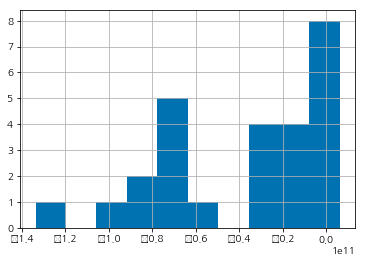

In [126]:
cost['net_profit'].hist()

In [127]:
cost.groupby('F-rated')['net_profit'].mean()

F-rated
0   -5.193851e+10
1   -3.267038e+10
2   -1.119109e+10
3   -5.129430e+09
Name: net_profit, dtype: float64

In [128]:
cost.groupby('F-rated')['net_profit'].median()

F-rated
0   -5.998365e+10
1   -2.186572e+10
2   -1.268264e+10
3   -5.129430e+09
Name: net_profit, dtype: float64

순수익이 거의다 마이너스로 나온다

순수익관객수 (총 관객수 - 손익분기점 관객수) 컬럼을 만들어본다

In [135]:
cost['break_even point'] = cost['break_even point'].replace('-', 0).apply(lambda x: int(x))

cost['net_profit_audi'] = cost['전국관객수'] - cost['break_even point']

cost['net_profit_from_audi'] = cost['net_profit_audi'] * 9_000

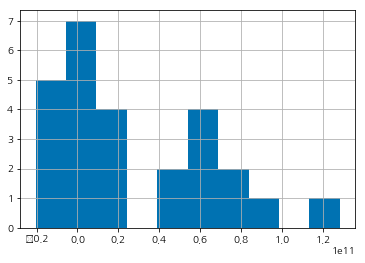

In [136]:
cost['net_profit_from_audi'].hist()

In [137]:
cost.groupby('F-rated')['net_profit_from_audi'].mean()

F-rated
0    3.979687e+10
1    1.644245e+10
2    4.614903e+09
3   -1.468498e+09
Name: net_profit_from_audi, dtype: float64

In [138]:
cost.groupby('F-rated')['net_profit_from_audi'].median()

F-rated
0    4.831259e+10
1    1.039485e+10
2    3.031398e+09
3   -1.468498e+09
Name: net_profit_from_audi, dtype: float64

In [146]:
cost.sort_values('전국매출액', ascending=False)[['영화명', '전국매출액', '개봉일','money', 'F-rated', '배우']]

,영화명,전국매출액,개봉일,money,F-rated,배우
593,극한직업,1.396480e+11,2019-01-23,60.0,0,"류승룡,이하늬,진선규,이동휘,공명,양현민,장진희,허준석,한준우,김명준,나철,정재광"
426,신과함께-죄와 벌,1.156987e+11,2017-12-20,400.0,0,"하정우,차태현,주지훈,김향기,마동석,김동욱,도경수,오달수,임원희,장광,정해균,김수안..."
70,베테랑,1.050248e+11,2015-08-05,60.0,0,"황정민,유아인,유해진,오달수,장윤주,김시후,오대환,정웅인,정만식,송영창,진경,유인영..."
66,암살,9.846313e+10,2015-07-22,220.0,1,"전지현,이정재,하정우,오달수,조진웅,이경영,최덕문,김의성,박병은,김홍파,강용빈,홍성..."
361,택시운전사,9.528475e+10,2017-08-02,120.0,1,"이수민,송강호,토마스 크레취만,유해진,류준열,박혁권,최귀화,이창섭,이호균,서정우,송..."
219,부산행,9.317588e+10,2016-07-20,86.0,0,"공유,김정희,정유미,김율호,마동석,최우식,안소희,김의성,김수안,박민우,박민혁,임종훈..."
649,기생충,8.587333e+10,2019-05-30,130.0,0,"송강호,이선균,조여정,최우식,박소담,장혜진,이정은,박명훈,현승민,정현준,윤혜리,박근록"
669,엑시트,7.918556e+10,2019-07-31,130.0,0,"조정석,윤아,고두심,박인환,김지영,강기영,오희준,배유람,유수빈,조성희,주보비"
152,검사외전,7.725276e+10,2016-02-03,60.0,0,"황정민,강동원,이성민,박성웅,김응수,신소율,주진모,김원해,김홍파,김병옥,박종환,전배..."
294,공조,6.378173e+10,2017-01-18,100.0,0,"현빈,유해진,김주혁,장영남,이해영,윤아,이동휘,박형수,서은지,신유철,이재남,공정환,..."


In [162]:
df[df['영화명'] == '물괴']['전국관객수'] 
# / df[df['영화명'] == '물괴']['상영횟수']

532    723414.0
Name: 전국관객수, dtype: float64

In [161]:
df[df['영화명'] == '미쓰백']['전국관객수'] 
# / df[df['영화명'] == '미쓰백']['상영횟수']

544    720558.0
Name: 전국관객수, dtype: float64

In [156]:
df[df['영화명'] == '미씽: 사라진 여자']['전국관객수'] / df[df['영화명'] == '미씽: 사라진 여자']['상영횟수']

277    28.384222
dtype: float64

In [159]:
df[df['영화명'] == '극한직업']['전국관객수'] / df[df['영화명'] == '극한직업']['상영횟수']

593    55.591822
dtype: float64

In [160]:
df[df['영화명'] == '암살']['전국관객수'] / df[df['영화명'] == '암살']['상영횟수']

66    72.515738
dtype: float64

# UBD 컬럼 추가

In [169]:
df['UBD'] = df['전국관객수'] / 172_212

print(df.shape)
df.sample()

(687, 47)


,영화명,영화코드,개봉일,대표국적,국적,장르,등급,영화형태,영화구분,제작사,배급사,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독,대표감독,감독코드,감독성별,감독_대표역할,감독필모,작가,대표작가,대표작가(필명),작가코드,작가성별,작가_대표역할,작가필모,배우,주연배우,배역명,배우코드,배우성별,배우_대표역할,배우필모,대표장르,datetime,year,month,day,weekday,weekday_name,상영횟수등급,UBD
18,개: dog eat dog,20143252,2015-03-05,한국,한국,"범죄,드라마",청소년관람불가,장편,독립/예술영화,"어썸피플,어썸픽쳐스","어썸피플,어뮤즈",179.0,12.0,10802000.0,1359.0,4437500.0,535.0,0,"황욱,박민우",황욱,20183861.0,남자,감독,라이브 하드|개: dog eat dog|누구나 제 명에 죽고 싶다|라이브 클럽 그레...,황욱,황욱,황욱,20183861.0,남자,감독,라이브 하드|개: dog eat dog|누구나 제 명에 죽고 싶다|라이브 클럽 그레...,"김선빈,곽민호,정준교,이하민,박형준,정완희,강필선,공민정",김선빈,형신,10004518,남자,배우,개: dog eat dog|설인|물고기|그대는 쇼팬하우어의 트리플악셀처럼|두 개의 ...,범죄,2015-03-05,2015,3,5,3,Thursday,4,0.007891


In [170]:
df['UBD']

# df.sort_values('UBD', ascending=False)

df.loc[df['UBD'] >= 1].shape

(233, 47)

# F-rated 와 상관관계

In [174]:
# 컬럼 추가
# 회당 매출액, 회당 관객수
df['회당 전국매출액'] = df['전국매출액'] / df['상영횟수']
df['회당 전국관객수'] = df['전국관객수'] / df['상영횟수']

df['회당 서울매출액'] = df['서울매출액'] / df['상영횟수']
df['회당 서울관객수'] = df['서울관객수'] / df['상영횟수']

In [175]:
df.corr()

,영화코드,상영횟수,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수,F-rated,감독코드,작가코드,배우코드,year,month,day,weekday,상영횟수등급,UBD,회당 전국매출액,회당 전국관객수,회당 서울매출액,회당 서울관객수
영화코드,1.000000,-0.018521,0.046118,-0.029828,-0.037977,-0.039310,-0.046400,0.015548,0.175026,0.060273,0.115705,0.807078,0.000639,0.042449,-0.089782,0.027122,-0.037977,-0.017033,-0.044727,-0.017991,-0.056168
상영횟수,-0.018521,1.000000,0.878682,0.950427,0.948723,0.949109,0.947055,-0.150264,-0.167107,-0.061473,-0.162291,0.031272,0.012549,-0.012140,-0.388987,0.705032,0.948723,0.751251,0.720270,0.387329,0.323813
전국스크린수,0.046118,0.878682,1.000000,0.773920,0.773126,0.768798,0.767351,-0.162666,-0.187626,-0.069512,-0.189735,0.114454,-0.021858,-0.002862,-0.494670,0.872580,0.773126,0.758385,0.723261,0.301014,0.232643
전국매출액,-0.029828,0.950427,0.773920,1.000000,0.999253,0.996123,0.995159,-0.149238,-0.150436,-0.051385,-0.143638,0.000426,0.040568,-0.022138,-0.319937,0.561621,0.999253,0.736957,0.712114,0.419266,0.361075
전국관객수,-0.037977,0.948723,0.773126,0.999253,1.000000,0.995812,0.996180,-0.149225,-0.153978,-0.051878,-0.144437,-0.009651,0.042599,-0.021969,-0.320398,0.563928,1.000000,0.740184,0.716865,0.420888,0.363511
서울매출액,-0.039310,0.949109,0.768798,0.996123,0.995812,1.000000,0.999381,-0.143958,-0.155048,-0.056766,-0.143082,-0.010715,0.042625,-0.015221,-0.313269,0.562393,0.995812,0.733047,0.708150,0.427695,0.368734
서울관객수,-0.046400,0.947055,0.767351,0.995159,0.996180,0.999381,1.000000,-0.143770,-0.157859,-0.056767,-0.143746,-0.019527,0.044058,-0.014491,-0.313577,0.563762,0.996180,0.735020,0.711585,0.428724,0.370727
F-rated,0.015548,-0.150264,-0.162666,-0.149238,-0.149225,-0.143958,-0.143770,1.000000,0.056270,0.085331,0.137037,0.061549,-0.025038,-0.010604,0.103093,-0.077772,-0.149225,-0.175300,-0.180778,-0.105327,-0.113315
감독코드,0.175026,-0.167107,-0.187626,-0.150436,-0.153978,-0.155048,-0.157859,0.056270,1.000000,0.655336,0.152744,0.158702,0.007548,-0.026430,0.018670,-0.178373,-0.153978,-0.187852,-0.183298,-0.124107,-0.104177
작가코드,0.060273,-0.061473,-0.069512,-0.051385,-0.051878,-0.056766,-0.056767,0.085331,0.655336,1.000000,0.069632,0.061831,-0.012944,-0.024717,-0.022241,-0.044900,-0.051878,-0.092756,-0.087219,-0.122255,-0.108367


전국매출액, 전국관객수 보다
[회당 전국매출액], [회당 전국관객수]의 상관계수가 더 높다

In [176]:
df[df['배우성별'] == '여자']['영화명']

0                           워킹걸
6                       미라클 여행기
19                          헬머니
29                         장수상회
30                     후쿠시마의 미래
35                        차이나타운
36                    위험한 상견례 2
38                       다이노 타임
40                    잡식가족의 딜레마
43                     명령불복종 교사
45                          막걸스
48                         코인라커
49                       은밀한 유혹
51                    한여름의 판타지아
53                경성학교: 사라진 소녀들
58                          마돈나
61                          파스카
63                       밀양 아리랑
66                           암살
68                        무서운 집
71                     이바라키의 여름
72                  성실한 나라의 앨리스
74                       미쓰 와이프
75                           순교
76                         위로공단
79                         오늘영화
80                      뷰티 인사이드
82                          오피스
83                      기적의 피아노
85                     돼지 같은 여자
87                      사랑이 이긴다
96      